In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import networkx as nx
import pandas as pd

with open('subj_dist.json') as f:
    data = json.load(f)

with open('jrnl_subj.json') as f:
    jrl = json.load(f)

name = pd.read_csv('subjects.csv')

In [2]:
m = np.zeros([len(data.keys()),len(data.keys())])

sub = dict(zip(data.keys(),np.arange(len(data.keys()))))
subx = dict(zip(np.arange(len(data.keys())),data.keys()))

for i in tqdm(range(len(data.keys()))):
    for j in list(jrl.values()):
        if subx[i] in j:
            for k in j:
                try:
                    m[i, sub[k]] += 1
                except:
                    print(i,j,k)

100%|██████████| 323/323 [00:00<00:00, 565.32it/s]


In [5]:
name.keys()

Index(['code', ' title', ' field '], dtype='object')

In [7]:
G=nx.from_numpy_matrix(m)
nx.set_node_attributes(G, {k: {'label': subx[k]} for k in subx.keys()})

pos = np.array(list(nx.spring_layout(G).values())).T

markers = []
for i in list(data.keys()):
    a = name[name.code == int(i)][' title'].values
    markers.append(a[0])

field = []
for i in list(data.keys()):
    a = name[name.code == int(i)][' field '].values
    field.append(a[0])

label = dict(zip(list(set(field)),np.arange(len(list(set(field))))))

In [8]:
color = []
label_list = []
for i in list(data.keys()):
    a = label[name[name.code == int(i)][' field '].values[0]]
    color.append([a//9,(a%9)//3,a%3])
    label_list.append(name[name.code == int(i)][' field '].values[0])

In [9]:
x,y = pos[0]*5000+1000,pos[1]*5000+1000
new_x = []
for i in x:
    try:
        if i > 0 :
            new_x.append(np.log(i))
        elif i < 0 :
            new_x.append(-1* np.log(-1*i))
        else:
            new_x.append(0.001)
    except:
        print(i)

new_y = []
for i in y:
    try:
        if i > 0 :
            new_y.append(np.log(i))
        elif i < 0 :
            new_y.append(-1* np.log(-1*i))
        else:
            new_y.append(0.001)
    except:
        print(i)
        
x = np.dot(new_x,5)
y = np.dot(new_y,5)

y[y<32] = 32
x[x<32] = 32
y[y>38] = 38
x[x>38] = 38

Text(0.5, 0, 'Degree')

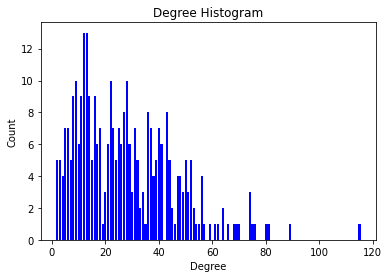

In [10]:
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

In [11]:
nx.degree_centrality(G);
nx.eigenvector_centrality(G).values();

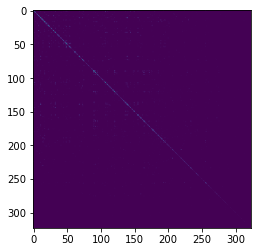

In [12]:
plt.imshow(m)

# plot

In [13]:
import numpy as np

from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label

N = pos[0].shape
# x,y = pos[0]*5,pos[1]*5
NumOfPub = np.array(list(data.values()))
NumOfPub[NumOfPub<30] = 30
NumOfPub[(50>NumOfPub) & (NumOfPub>30)] = 50
radii = NumOfPub/5000
# radii = np.log(np.array(list(data.values())))/1000

# colors = ["#%02x%02x%02x" % (int(50+r*50), int(50+g*50), 150) for r, g in color]
colors = ["#%02x%02x%02x" % (r*70, g*70, b*70) for r, g, b in color]

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS,sizing_mode='stretch_both')
source = ColumnDataSource(data=dict(x=x,y=y,radii1=radii,radii2=radii*3,colors=colors,field=field,markers=markers,
                                    number=np.array(list(data.values())),
                                    centrality=list(nx.eigenvector_centrality(G).values()),
                                    clustering=list(nx.clustering(G).values()),
                                    label_list = label_list))

# p.scatter('x', 'y', radius='radii1',fill_color='colors', fill_alpha=0.6,source=source,line_color=None)

# p.circle('x', 'y', radius='radii2',fill_color='colors', fill_alpha=0.1,source=source,line_color=None)
p.circle('x', 'y', radius='radii1',fill_color='colors', fill_alpha=0.6,source=source,line_color=None,legend='label_list')


p.hover.tooltips = [("Subject", "@markers"),("Number Of Published", "@number"),("Field", "@field"),("Clustering", "@clustering"),("Centrality", "@centrality")]
# labels = LabelSet(x="x", y="y", text="markers", y_offset=8,
#                   text_font_size="6pt", text_color="#555555",
#                   source=source, text_align='center')
# p.add_layout(labels)
# p.sizing_mode = 'scale_height'

output_file("Network Visualization.html", title="Network Visualization")
show(p)

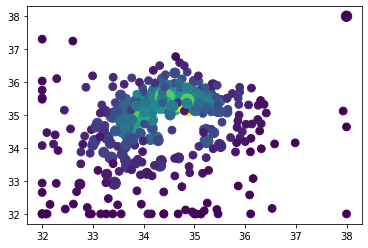

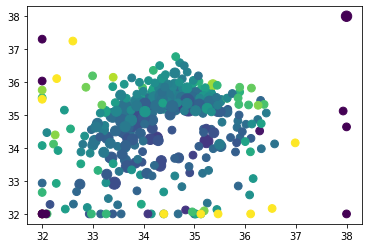

In [14]:
data = dict(x=x,y=y,radii1=radii*10000,radii2=radii*3,colors=color,field=field,markers=markers,number=np.array(list(data.values())))

plt.scatter('x','y',s='radii1',c=nx.eigenvector_centrality(G).values(),data=data)
plt.show()
plt.scatter('x','y',s='radii1',c=nx.clustering(G).values(),data=data)

In [15]:
# nx.community.greedy_modularity_communities(G)
# nx.best

In [17]:
# import numpy as np; np.random.seed(0)
# import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (6,2.8)

# animals = [['no animal', 'no animal', 'no animal', 'chicken', 'chicken'],
#      ['no animal', 'no animal', 'cow', 'no animal', 'chicken'],
#      ['no animal', 'cow', 'cat', 'cat', 'no animal'],
#      ['no animal', 'cow', 'fox', 'cat', 'no animal'],
#      ['cow', 'cow', 'fox', 'chicken', 'no animal'],
#      ['no animal','cow', 'chicken', 'chicken', 'no animal'],
#      ['no animal', 'no animal', 'chicken', 'cat', 'chicken'],
#      ['no animal', 'no animal', 'no animal', 'cat', 'no animal']]

# y = np.linspace(-4,4, 8)
# x = np.linspace(-3,3, 5)
# X,Y = np.meshgrid(x,y)

# an = {"cow":1,"no animal":0,"chicken":2,"cat":3, "fox":4}
# aninv =  { val: key for key, val in an.items()  }
# f = lambda x: an[x]
# fv = np.vectorize(f)
# Z = fv(animals)


# fig, (ax) = plt.subplots(ncols=1)
# ax.set_title("contourf"); ax2.set_title("imshow")

# im = ax.contourf(X,Y,Z, levels=[-0.5,0.5,1.5,2.5,3.5,4.5] )
# cbar = fig.colorbar(im, ax=ax)
# cbar.set_ticks([0,1,2,3,4])
# cbar.set_ticklabels([aninv[t] for t in [0,1,2,3,4]])


# plt.tight_layout()
# plt.show()

In [20]:
# x = np.arange(1, 10)
# y = x.reshape(-1, 1)
# h = x * y

# cs = plt.contourf(h)
# h

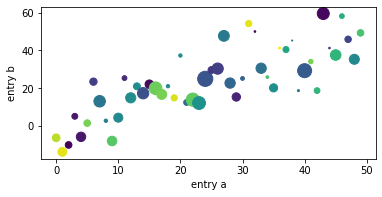

In [21]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

# just saved codes!

In [22]:
import numpy as np

from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label

N = pos[0].shape
# x,y = pos[0]*5,pos[1]*5
NumOfPub = np.array(list(data.values()))
NumOfPub[NumOfPub<30] = 30
NumOfPub[(50>NumOfPub) & (NumOfPub>30)] = 50
radii = NumOfPub/5000
# radii = np.log(np.array(list(data.values())))/1000

colors = ["#%02x%02x%02x" % (int(50+r*50), int(50+g*50), 150) for r, g in color]

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS,sizing_mode='stretch_both')
source = ColumnDataSource(data=dict(x=x,y=y,radii1=radii,radii2=radii*3,radii3=radii*9,colors=colors,field=field,markers=markers,number=np.array(list(data.values()))))

p.scatter('x', 'y', radius='radii1',fill_color='colors',muted_alpha=0.1, fill_alpha=1,source=source,line_color=None)

p.circle('x', 'y', radius='radii2',fill_color='colors', fill_alpha=0.3,source=source,line_color=None)

p.circle('x', 'y', radius='radii3',fill_color='colors', fill_alpha=0.1,source=source,line_color=None)


p.hover.tooltips = [("Subject", "@markers"),("Number Of Published", "@number"),("Field", "@field")]
# labels = LabelSet(x="x", y="y", text="markers", y_offset=8,
#                   text_font_size="4pt", text_color="#555555",
#                   source=source, text_align='center')
# p.add_layout(labels)
# p.sizing_mode = 'scale_height'
output_file("Network Visualization.html", title="Network Visualization")
show(p)

ValueError: too many values to unpack (expected 2)

In [23]:
import networkx as nx

from bokeh.io import show, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle
from bokeh.models import HoverTool, TapTool, BoxSelectTool
from bokeh.models.graphs import from_networkx
from bokeh.models.graphs import NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4

plot = Plot(
    plot_width=400,
    plot_height=400,
    x_range=Range1d(-1.1,1.1),
    y_range=Range1d(-1.1,1.1)
)
plot.title.text = "WAKA"

plot.add_tools(
    HoverTool(tooltips=None),
    TapTool(),
    BoxSelectTool()
)

graph_renderer = from_networkx(
    G,
    nx.circular_layout,
    scale=1,
    center=(0,0)
)

graph_renderer.node_renderer.glyph = Circle(
    size=15,
    fill_color=Spectral4[0]
)
graph_renderer.node_renderer.selection_glyph = Circle(
    size=25,
    fill_color=Spectral4[2]
)
graph_renderer.node_renderer.hover_glyph = Circle(
    size=20,
    fill_color=Spectral4[1]
)

graph_renderer.edge_renderer.glyph = MultiLine(
    line_color="#CCCCCC",
    line_alpha=0.8,
    line_width=3
)
graph_renderer.edge_renderer.selection_glyph = MultiLine(
    line_color=Spectral4[2],
    line_width=7
)
graph_renderer.edge_renderer.hover_glyph = MultiLine(
    line_color=Spectral4[1],
    line_width=5
)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)

output_file("waka.html")
show(plot)

In [25]:
import pandas as pd

from bokeh.layouts import column, row
from bokeh.models import Select
from bokeh.palettes import Spectral5
from bokeh.plotting import curdoc, figure
from bokeh.sampledata.autompg import autompg_clean as df

df = df.copy()

SIZES = list(range(6, 22, 3))
COLORS = Spectral5
N_SIZES = len(SIZES)
N_COLORS = len(COLORS)

# data cleanup
df.cyl = df.cyl.astype(str)
df.yr = df.yr.astype(str)
del df['name']

columns = sorted(df.columns)
discrete = [x for x in columns if df[x].dtype == object]
continuous = [x for x in columns if x not in discrete]

def create_figure():
    xs = df[x.value].values
    ys = df[y.value].values/
    x_title = x.value.title()
    y_title = y.value.title()

    kw = dict()
    if x.value in discrete:
        kw['x_range'] = sorted(set(xs))
    if y.value in discrete:
        kw['y_range'] = sorted(set(ys))
    kw['title'] = "%s vs %s" % (x_title, y_title)

    p = figure(plot_height=600, plot_width=800, tools='pan,box_zoom,hover,reset', **kw)
    p.xaxis.axis_label = x_title
    p.yaxis.axis_label = y_title

    if x.value in discrete:
        p.xaxis.major_label_orientation = pd.np.pi / 4

    sz = 9
    if size.value != 'None':
        if len(set(df[size.value])) > N_SIZES:
            groups = pd.qcut(df[size.value].values, N_SIZES, duplicates='drop')
        else:
            groups = pd.Categorical(df[size.value])
        sz = [SIZES[xx] for xx in groups.codes]

    c = "#31AADE"
    if color.value != 'None':
        if len(set(df[color.value])) > N_COLORS:
            groups = pd.qcut(df[color.value].values, N_COLORS, duplicates='drop')
        else:
            groups = pd.Categorical(df[color.value])
        c = [COLORS[xx] for xx in groups.codes]

    p.circle(x=xs, y=ys, color=c, size=sz, line_color="white", alpha=0.6, hover_color='white', hover_alpha=0.5)

    return p


def update(attr, old, new):
    layout.children[1] = create_figure()


x = Select(title='X-Axis', value='mpg', options=columns)
x.on_change('value', update)

y = Select(title='Y-Axis', value='hp', options=columns)
y.on_change('value', update)

size = Select(title='Size', value='None', options=['None'] + continuous)
size.on_change('value', update)

color = Select(title='Color', value='None', options=['None'] + continuous)
color.on_change('value', update)

controls = column(x, y, color, size, width=200)
layout = row(controls, create_figure())

curdoc().add_root(layout)
curdoc().title = "Crossfilter"

SyntaxError: invalid syntax (<ipython-input-25-7cddd8f064d4>, line 27)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=7)
X = np.array(list(zip(x,y)))
Y = []
for i in list(data.keys()):
    Y.append(int(i[0:2]))
Y = np.array(Y)

clf.fit(X, Y)

ValueError: invalid literal for int() with base 10: 'a'

In [27]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()

ax.contourf(xx, yy, Z, alpha=0.4);
ax.scatter(x,y,s = radii*10000,c = Y-10,alpha=0.6)

for i, txt in enumerate(markers):
    ax.annotate(txt, (x[i], y[i]))

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.